In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def mmar(N, P, sigma=1.0, x0=None, seed= 44):
    eps = np.random.normal(0.0, sigma, size=N)

    X = np.empty(N)
    if x0 is None:
        X[0] = eps[0]         
    else:
        X[0] = x0

    state = np.zeros(N, dtype=int)  
    
    state[0] = 0

    for t in range(1, N):
        p_trans = P[state[t-1]]
        state[t] = np.random.choice(len(P), p=p_trans)

        
        if state[t] == 0:
            # Regime 1
            X[t] = 1.0 + 0.6 * X[t-1] + eps[t]
        else:
            # Regime 2
            X[t] = -1.0 + 0.4 * X[t-1] + eps[t]

    return X, eps, state

In [55]:
N = 1000 
time_steps = np.arange(N)

In [63]:
P = np.array([
    [0.9, 0.1],   # from Regime 1 -> (stay, switch)
    [0.1, 0.9]    # from Regime 2 -> (switch, stay)
])


#P = np.array([
    #[0.99, 0.1],   # high persistence
    #[0.01, 0.99]
#])


#P = np.array([
#    [0.98, 0.02],   # assymetric
#    [0.30, 0.70]   
#])

In [57]:
X_mmar, eps_mmar, s_mmar = mmar(N, P, sigma=1.0, x0=None, seed=44)

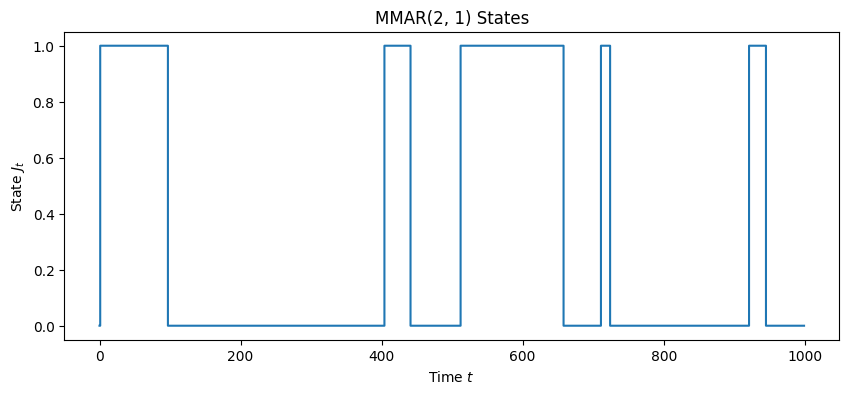

In [58]:
plt.figure(figsize=(10, 4))
plt.title('MMAR(2, 1) States')
plt.ylabel(r'State $J_t$')
plt.xlabel(r'Time $t$')
plt.step(time_steps, s_mmar, where='post')
plt.show()

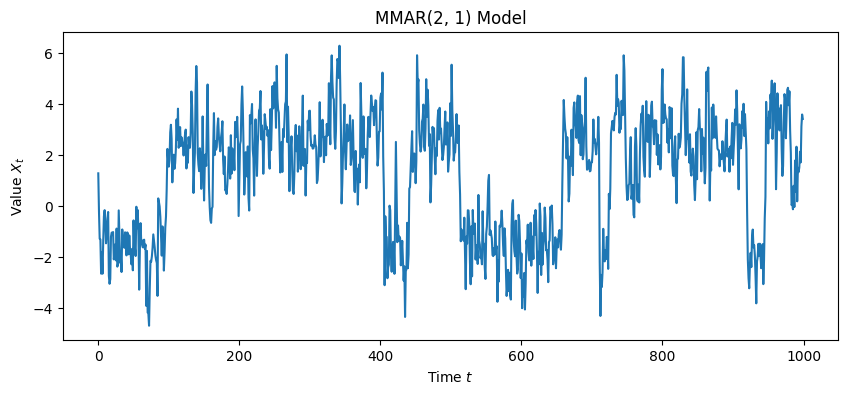

<Figure size 640x480 with 0 Axes>

In [59]:
plt.figure(figsize=(10, 4))
plt.title('MMAR(2, 1) Model')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Value $X_t$')
plt.plot(time_steps, X_mmar, linestyle='-')
plt.show()

plt.savefig('MMAR_Xt.pdf')